1. Import the necessary libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
from sklearn.datasets import load_iris


wr.filterwarnings('ignore')

Load the dataset

In [ ]:
iris_data = load_iris()
iris_df = pd.DataFrame(data = iris_data.data, #convert into pandas dataframe
                       columns = iris_data.feature_names)

iris_df['species'] = iris_data.target

# display the first 5 records
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Explore the data

In [ ]:
# number of rows and columns
iris_df.shape

(150, 5)

You can see that species column is integer. We want it to be the name of the species.

In [ ]:
# lets map the name of the species
species_names = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}

iris_df['species'] = iris_df['species'].map(species_names)

In [ ]:
#column and data types
iris_df.dtypes

,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64
species,object


In [ ]:
# see the dataset again
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


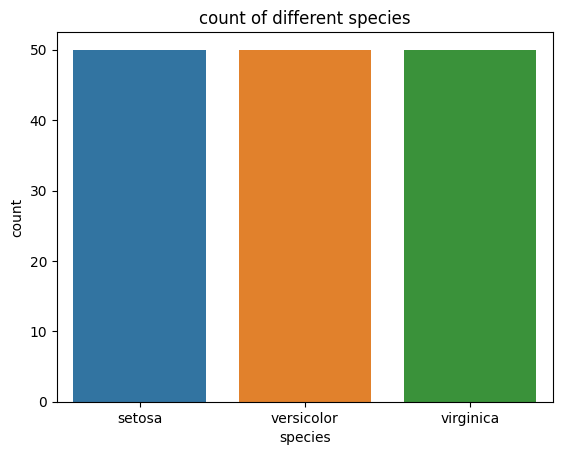

In [ ]:
# bar plot for species names
sns.countplot(iris_df, x = 'species', hue = 'species')
plt.title('count of different species')
plt.show()

In [ ]:
# statistical description of columns
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# null values
iris_df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


So, there are no values that are null or zero.

# Univariate Analysis

**Distribution for each featue using Histogram**

Text(0.5, 1.0, 'Distribution of Petal width')

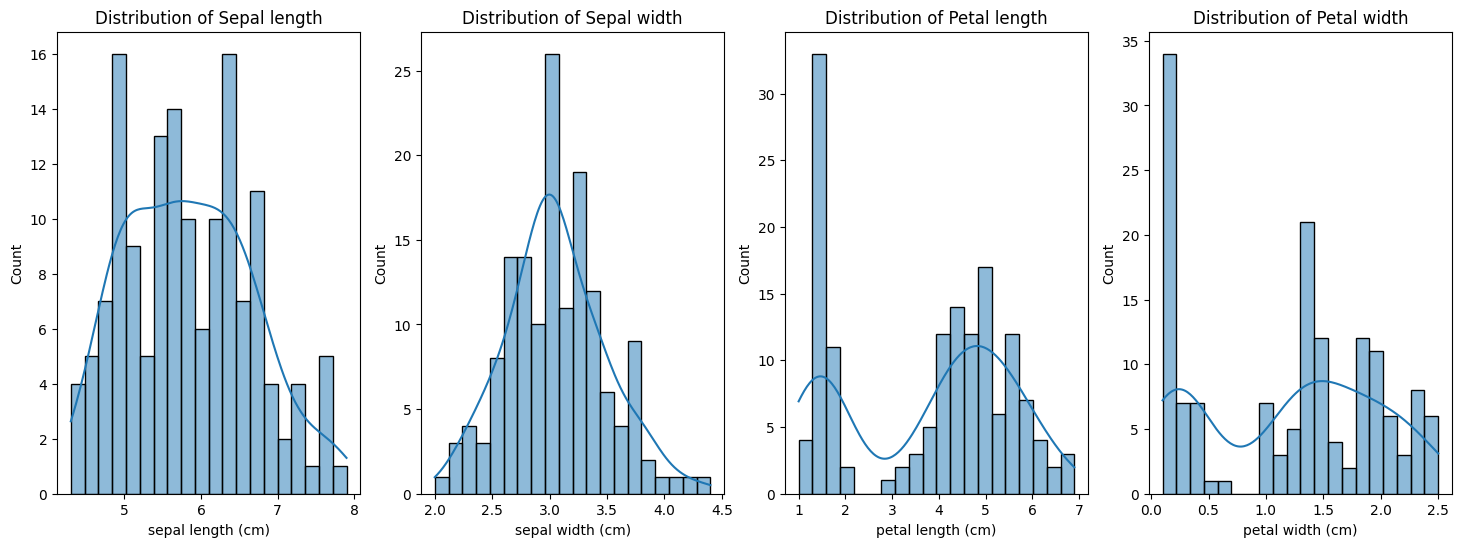

In [ ]:
# histograms
fig,ax = plt.subplots(1,4,figsize=(18,6))
sns.histplot(ax = ax[0], data = iris_df, x = "sepal length (cm)",bins =20,kde = True)
ax[0].set_title("Distribution of Sepal length")

sns.histplot(ax = ax[1], data = iris_df, x = "sepal width (cm)",bins =20,kde = True)
ax[1].set_title("Distribution of Sepal width")

sns.histplot(ax = ax[2], data = iris_df, x = "petal length (cm)",bins =20,kde = True)
ax[2].set_title("Distribution of Petal length")

sns.histplot(ax = ax[3], data = iris_df, x = "petal width (cm)",bins =20,kde = True)
ax[3].set_title("Distribution of Petal width")


The petal features exhibit a bimodal distribution, with two distinct peaks. This pattern is likely attributed to the variations in these features across different species.

<Axes: xlabel='petal length (cm)', ylabel='Density'>

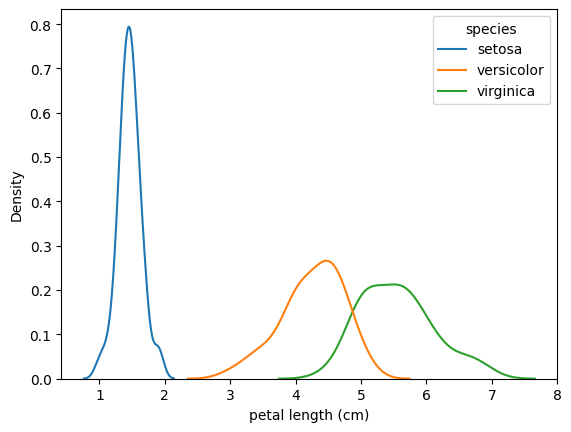

In [ ]:

sns.kdeplot(data = iris_df, x = 'petal length (cm)', hue = 'species')




<Axes: xlabel='petal width (cm)', ylabel='Density'>

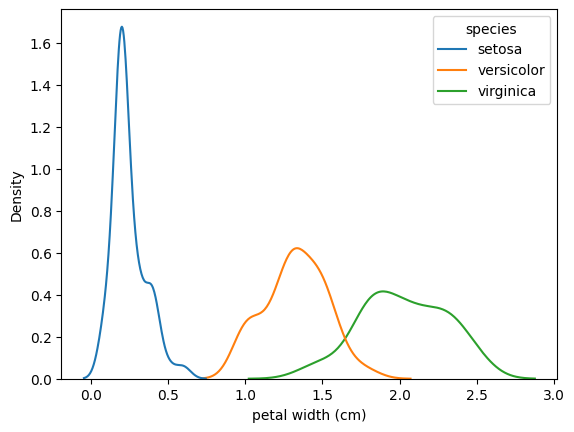

In [ ]:

sns.kdeplot(data = iris_df, x = 'petal width (cm)', hue = 'species')


**Outliers using Boxplots**

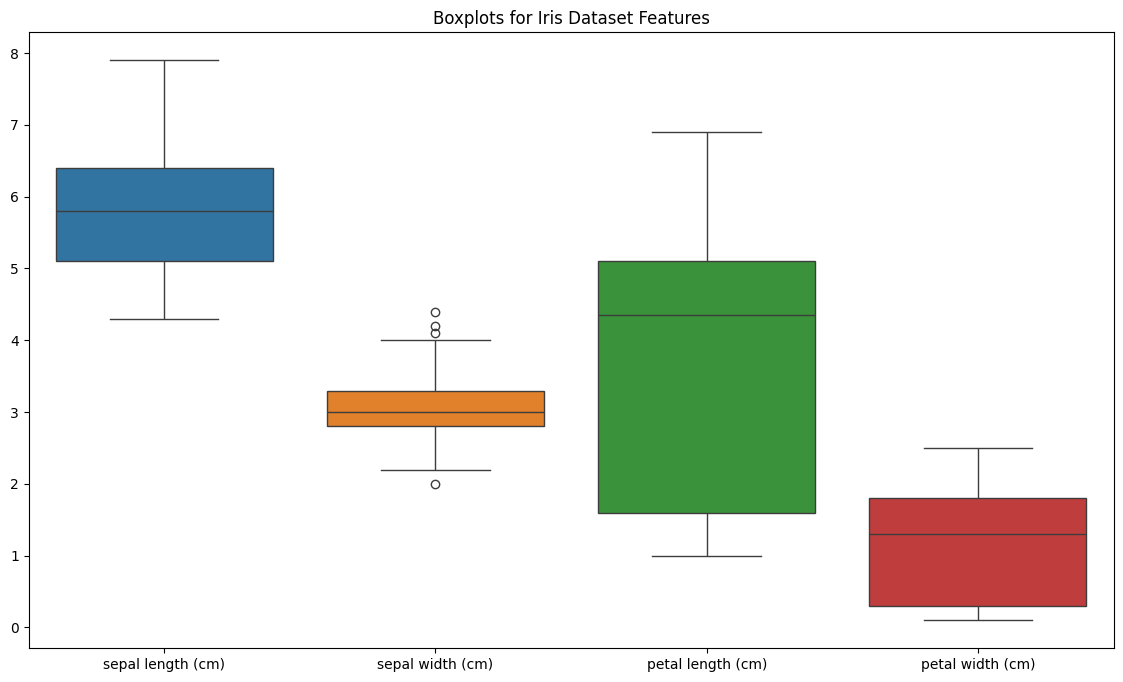

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=iris_df)

plt.title('Boxplots for Iris Dataset Features')
plt.show()



In [ ]:
# possible outlier for sepal width
outliers = iris_df[(iris_df['sepal width (cm)'] >= 4) | (iris_df['sepal width (cm)'] <= 2) ]
print(outliers)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
14                5.8               4.0                1.2               0.2   
15                5.7               4.4                1.5               0.4   
32                5.2               4.1                1.5               0.1   
33                5.5               4.2                1.4               0.2   
60                5.0               2.0                3.5               1.0   

       species  
14      setosa  
15      setosa  
32      setosa  
33      setosa  
60  versicolor  


In [ ]:
# to print them in a single line
#print(outliers.to_string())


**Kde plot for Sepal Width by individual species to understand the individual distributions**

<Axes: xlabel='sepal width (cm)', ylabel='Density'>

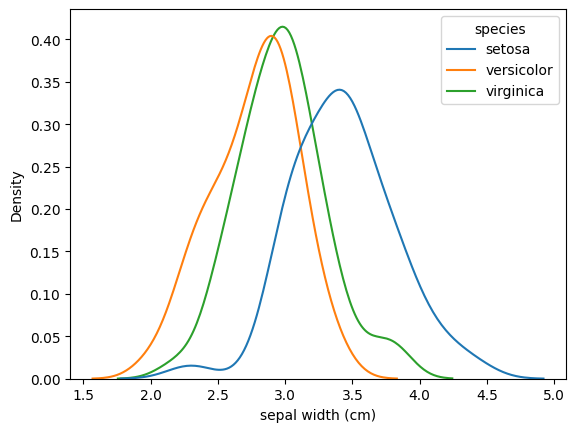

In [ ]:
sns.kdeplot(iris_df, x = 'sepal width (cm)', hue = 'species')

We can see that the species setosa's distribution for sepal width is centered more to the right compared to the two other species. This maybe the reason for the three points above the whiskers in our boxplot.

# Bivariate and Multivariate Analysis

**Pairplots**

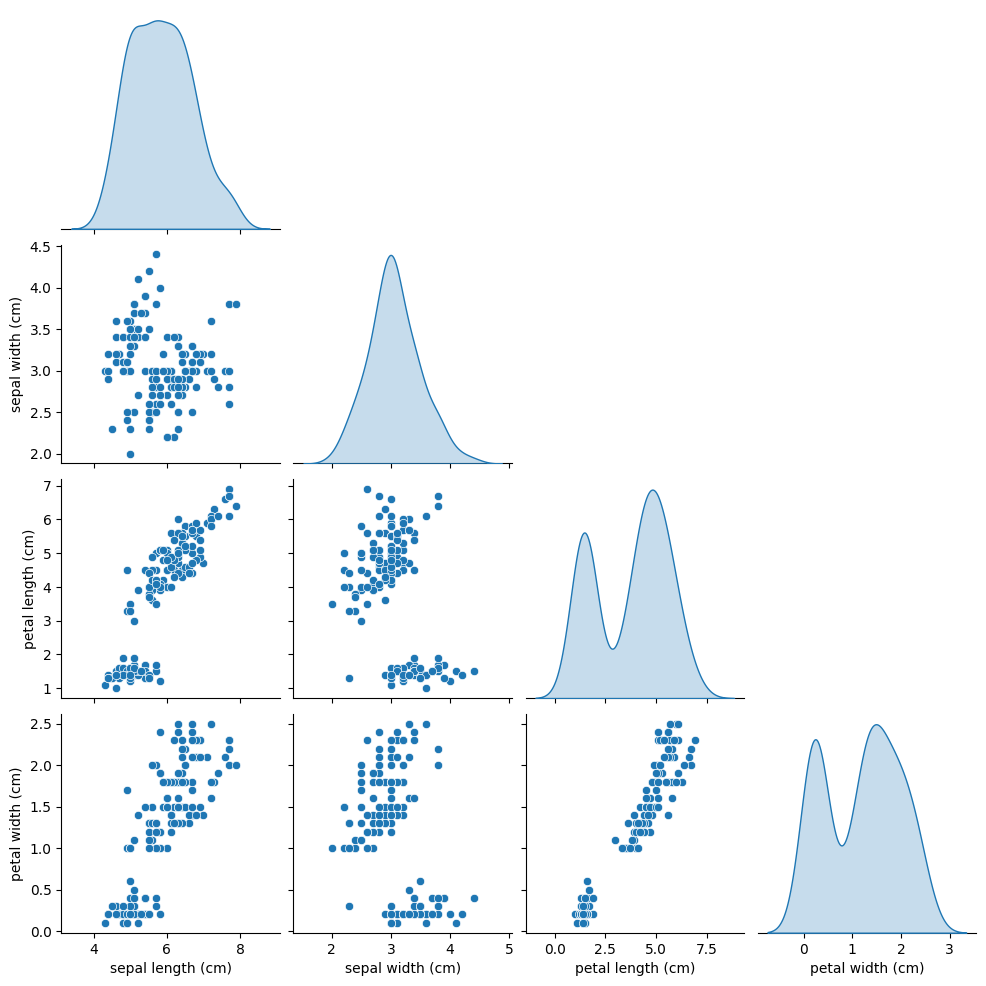

In [ ]:

sns.pairplot(iris_df, corner=True, diag_kind='kde')


If you see the pariplots involving sepal width, the points are very dispersed compared to pairplots between other two features. There seems to be very less relationship of sepal width with other two features.

**Correlation Analysis**

<Axes: >

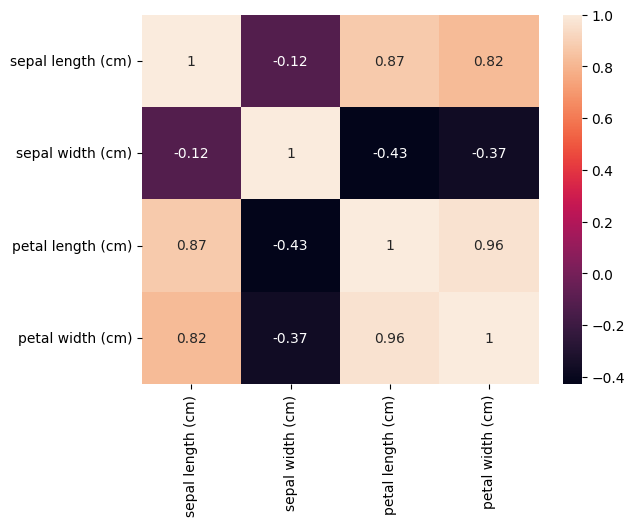

In [ ]:
# Correlation
sns.heatmap(iris_df.corr(numeric_only = True),annot =True)

From the correlation matrix, we can further see that while the other three features have high positive correlation between themselves. The sepal width feature has weak or negative correlation.

# ***Species***

In [ ]:
# lets see the average lengths and width by species

In [ ]:
species_aggregate = iris_df.groupby(by= 'species'). mean().reset_index()
species_aggregate.head()

,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


<Axes: title={'center': 'petal width'}, xlabel='species', ylabel='petal width (cm)'>

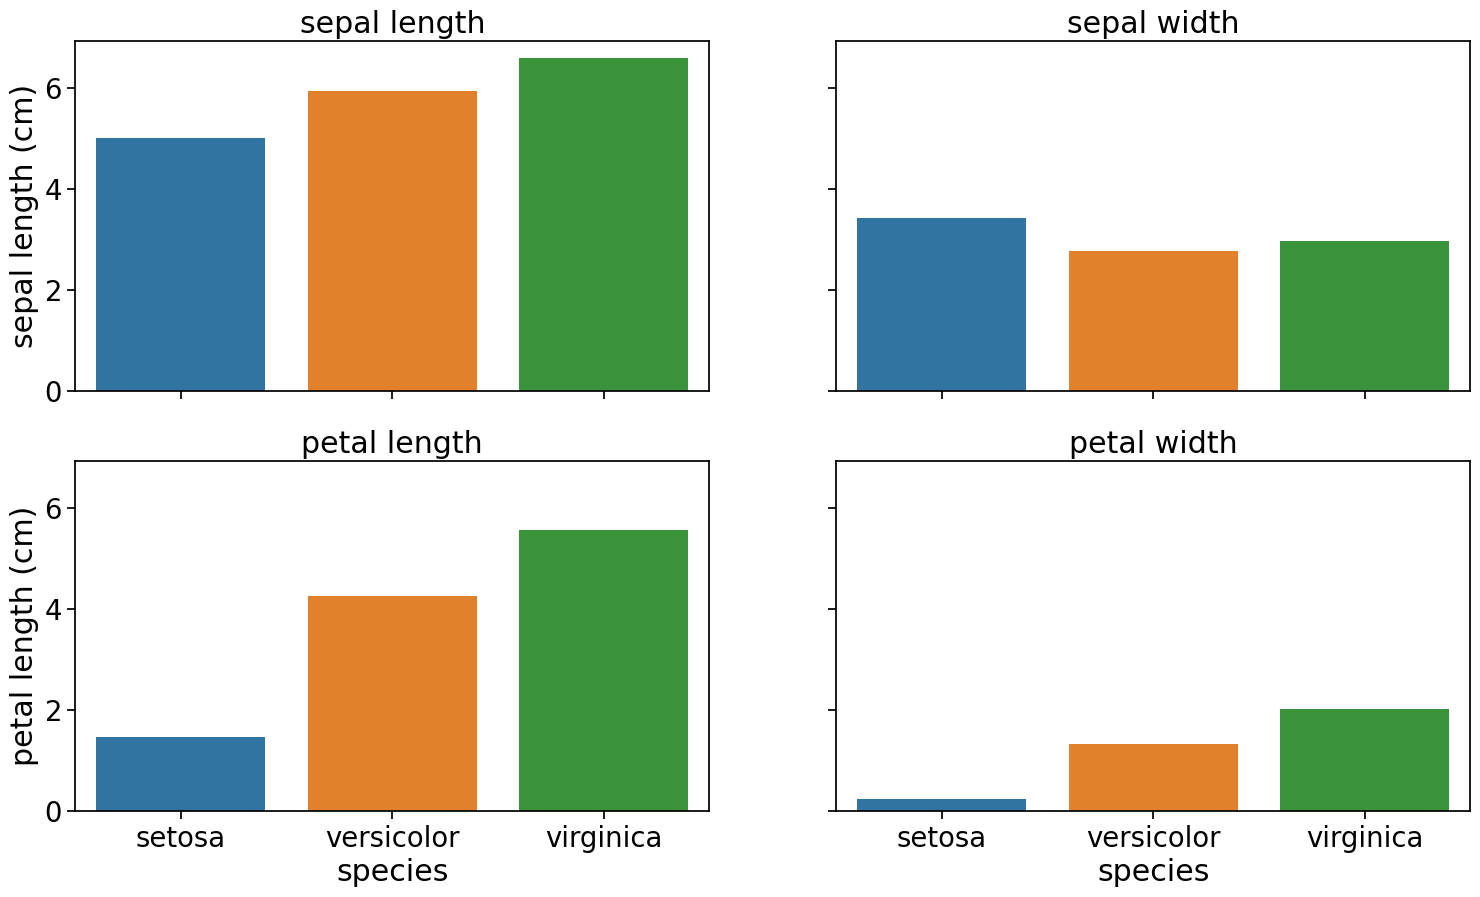

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (18,10),sharex = True, sharey =True)


ax[0,0].set_title('sepal length')
ax[0,1].set_title('sepal width')
ax[1,0].set_title('petal length')
ax[1,1].set_title('petal width')
sns.barplot(ax = ax[0,0], data = species_aggregate, x='species', y = 'sepal length (cm)',hue= 'species')
sns.barplot(ax = ax[0,1], data = species_aggregate, x='species', y = 'sepal width (cm)',hue= 'species')
sns.barplot(ax = ax[1,0], data = species_aggregate, x='species', y = 'petal length (cm)',hue= 'species')
sns.barplot(ax = ax[1,1], data = species_aggregate, x='species', y = 'petal width (cm)',hue= 'species')



There a few things we can notice from the plots:



*   The length features 'sepal length' and ' petal length' seem to be larger on average compared to the width features.

*   There are similar trends for the different features. For the three features: sepal length, petal length and petal width, setosa has the smallest mean, versicolor is in the middle and virginica has the largest mean. This trend across the three features makes sense as there was high correlation between the three features.

*   In terms of sepal width, setosa species have the largest mean which is in complete contrast to their performance in other three features. This does make sense in terms of our previous observation of it being weak negatively correlated with other features.

Based on these observations, petal features (length and width) could be more useful in classification tasks, such as distinguishing Versicolor and Virginica, while sepal width might be better for differentiating Setosa from the other two species.







